In [47]:
from data_collector import data_collector
import numpy as np

d = data_collector()
b = data_collector(path='Donnerstag_Messungen.CSV', csv_type='ger')
"""for data, target in zip(b['data'], b['target']):
    d['data'] += data
    d['target'] += target
"""

"for data, target in zip(b['data'], b['target']):\n    d['data'] += data\n    d['target'] += target\n"

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(d['data'], d['target'])
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    np.array([list([row[1]]) + list(row[3:len(row)]) for row in d['data']]),
    d['target'])

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6750, 8)
y_train shape: (6750,)
X_test shape: (2250, 8)
y_test shape: (2250,)


array([[<AxesSubplot:xlabel='gyro_scaled_x', ylabel='gyro_scaled_x'>,
        <AxesSubplot:xlabel='gyro_scaled_y', ylabel='gyro_scaled_x'>,
        <AxesSubplot:xlabel='gyro_scaled_z', ylabel='gyro_scaled_x'>,
        <AxesSubplot:xlabel='acc_scaled_x', ylabel='gyro_scaled_x'>,
        <AxesSubplot:xlabel='acc_scaled_y', ylabel='gyro_scaled_x'>,
        <AxesSubplot:xlabel='acc_scaled_z', ylabel='gyro_scaled_x'>,
        <AxesSubplot:xlabel='rot_x', ylabel='gyro_scaled_x'>,
        <AxesSubplot:xlabel='rot_y', ylabel='gyro_scaled_x'>],
       [<AxesSubplot:xlabel='gyro_scaled_x', ylabel='gyro_scaled_y'>,
        <AxesSubplot:xlabel='gyro_scaled_y', ylabel='gyro_scaled_y'>,
        <AxesSubplot:xlabel='gyro_scaled_z', ylabel='gyro_scaled_y'>,
        <AxesSubplot:xlabel='acc_scaled_x', ylabel='gyro_scaled_y'>,
        <AxesSubplot:xlabel='acc_scaled_y', ylabel='gyro_scaled_y'>,
        <AxesSubplot:xlabel='acc_scaled_z', ylabel='gyro_scaled_y'>,
        <AxesSubplot:xlabel='rot_x', ylab

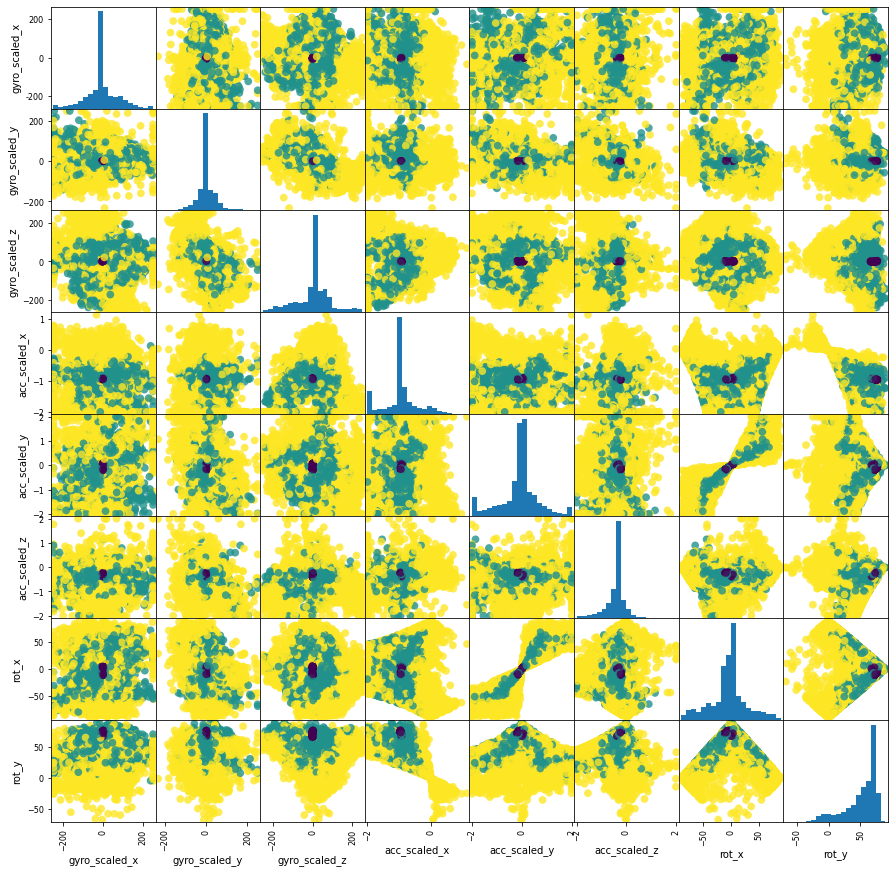

In [49]:
import pandas as pd

activity_dataframe = pd.DataFrame(X_train, columns=d['feature_names'])
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(activity_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)


In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_new = KNeighborsClassifier(n_neighbors=3).fit(X_train_new, y_train_new)

svc = SVC(C=1000)
svc.fit(X_train, y_train)
svc_new = SVC(C=1000).fit(X_train_new, y_train_new)

mlp = MLPClassifier().fit(X_train, y_train)
mlp_new = MLPClassifier().fit(X_train_new, y_train_new)

In [51]:

y_pred_knn = knn.predict(X_test)
y_pred_svc = svc.predict(X_test)

print("Test set score KNN: {:.2f}".format(knn.score(X_test, y_test)))
print("Test set score SVC: {:.2f}".format(svc.score(X_test, y_test)))
print("Test set score MLP: {:.2f}".format(mlp.score(X_test, y_test)))

print("Test set score KNN after feature removal: {:.2f}".format(knn_new.score(X_test_new, y_test_new)))
print("Test set score SVC after feature removal: {:.2f}".format(svc_new.score(X_test_new, y_test_new)))
print("Test set score MLP after feature removal: {:.2f}".format(mlp_new.score(X_test_new, y_test_new)))

Test set score KNN: 0.94
Test set score SVC: 0.96
Test set score MLP: 0.94
Test set score KNN after feature removal: 0.88
Test set score SVC after feature removal: 0.92
Test set score MLP after feature removal: 0.91


In [52]:
X_many_test = b['data']
y_many_test = b['target']
X_many_test_new = np.array([list([row[1]]) + list(row[3:len(row)]) for row in b['data']])

print("Test set score with big data KNN: {:.2f}".format(knn.score(X_many_test, y_many_test)))
print("Test set score with big data SVC: {:.2f}".format(svc.score(X_many_test, y_many_test)))
print("Test set score with big data MLP: {:.2f}".format(mlp.score(X_many_test, y_many_test)))

print("Test set score with big data KNN after feature removal: {:.2f}".format(knn_new.score(X_many_test_new, y_many_test)))
print("Test set score with big data SVC after feature removal: {:.2f}".format(svc_new.score(X_many_test_new, y_many_test)))
print("Test set score with big data MLP after feature removal: {:.2f}".format(mlp_new.score(X_many_test_new, y_many_test)))

Test set score with big data KNN: 0.85
Test set score with big data SVC: 0.84
Test set score with big data MLP: 0.85
Test set score with big data KNN after feature removal: 0.74
Test set score with big data SVC after feature removal: 0.84
Test set score with big data MLP after feature removal: 0.82


In [53]:
X_many_test = X_many_test[:482]
y_many_test = y_many_test[:482]
X_many_test_new = X_many_test_new[:482]

print("Test set score with single data collection KNN: {:.2f}".format(knn.score(X_many_test, y_many_test)))
print("Test set score with single data collection SVC: {:.2f}".format(svc.score(X_many_test, y_many_test)))
print("Test set score with single data collection MLP: {:.2f}".format(mlp.score(X_many_test, y_many_test)))

print("Test set score with single data collection KNN after feature removal: {:.2f}".format(knn_new.score(X_many_test_new, y_many_test)))
print("Test set score with single data collection SVC after feature removal: {:.2f}".format(svc_new.score(X_many_test_new, y_many_test)))
print("Test set score with single data collection MLP after feature removal: {:.2f}".format(mlp_new.score(X_many_test_new, y_many_test)))

Test set score with single data collection KNN: 0.81
Test set score with single data collection SVC: 0.68
Test set score with single data collection MLP: 0.74
Test set score with single data collection KNN after feature removal: 0.57
Test set score with single data collection SVC after feature removal: 0.75
Test set score with single data collection MLP after feature removal: 0.84


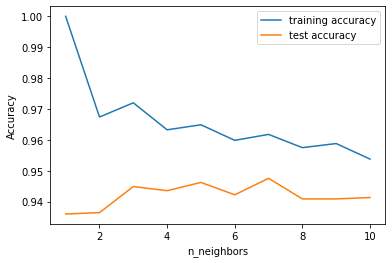

In [54]:
import matplotlib.pyplot as plt

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


In [55]:
from sklearn.feature_selection import SelectPercentile

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(d['data']), 13))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([d['data'], noise])
X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, d['target'], random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (4500, 21)
X_train_selected.shape: (4500, 10)


[False  True False  True  True  True  True  True False False False False
 False False  True  True False  True False False  True]


([], [])

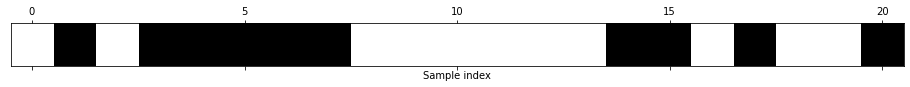

In [56]:
mask = select.get_support()
print(mask)
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [57]:
from joblib import dump, load

print("Test set score with single data collection KNN: {:.2f}".format(knn.score(X_many_test, y_many_test)))
print("Test set score with single data collection MLP after feature removal: {:.2f}".format(mlp_new.score(X_many_test_new, y_many_test)))

dump(knn, 'knn_model.joblib')
dump(mlp_new, 'mlp_model.joblib')

Test set score with single data collection KNN: 0.81
Test set score with single data collection MLP after feature removal: 0.84


['mlp_model.joblib']

In [58]:
print(type(load('knn_model.joblib')))


<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
